# Importing Libraries


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Dataset


In [3]:
dataframe = pd.read_csv('../merged_data.csv')

In [4]:
dataframe

,SMILES,ID,MolWt,LogP,HBD,HBA,RotatableBonds,TPSA,Volume,LipinskiViolations,NumAtoms,Exp. dG,Pred. dG
0,CN1C(=[NH+][C@@](c2cccc(c3cccc(Cl)c3)c2)(C2CCC...,CAT-13f,368.89,2.26,2,2,3,60.30,221.78,0,26,-9.09,-10.24
1,CN1C(=[NH+][C@@](c2cccc(c3cccc(Cl)c3)c2)(C2CC2...,CAT-13d,340.83,1.48,2,2,3,60.30,204.89,0,24,-10.47,-10.50
2,COc1ccc(c2cccc([C@@]3(c4ccccc4)[NH+]=C(N)N(C)C...,CAT-4c,372.45,1.47,2,3,4,69.53,224.20,0,28,-7.85,-7.52
3,CC[C@]1(c2cccc(c3cccc(Cl)c3)c2)[NH+]=C(N)N(C)C1=O,CAT-13b,328.82,1.48,2,2,3,60.30,197.66,0,23,-9.12,-8.92
4,CN1C(=[NH+][C@](c2ccccc2)(c2cccc(c3cnccn3)c2)C...,CAT-4l,344.40,0.25,2,4,3,86.08,207.32,0,26,-9.34,-7.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,c1c(c(ccc1F)Oc1c(=O)n(c2c(c1)cnc(n2)NCC(C)(O)C...,p38a_2y,376.36,2.58,2,7,5,89.27,226.59,0,27,-9.78,-10.60
207,C1COCCC1Nc1ncc2cc(c(=O)n(c2n1)C)Cc1c(cccc1)F,p38a_2i,368.41,2.65,1,6,4,69.04,221.79,0,27,-10.05,-10.22
208,c1c(c(ccc1F)Oc1c(=O)n(c2c(c1)cnc(n2)NC1CCOCC1)...,p38a_2o,480.49,2.50,1,9,7,112.41,289.23,0,33,-10.49,-9.46
209,c1c(c(ccc1F)Oc1c(=O)n(c2c(c1)cnc(n2)N[C@@H]1CC...,p38a_2ff,402.40,3.11,2,7,4,89.27,242.26,0,29,-11.44,-10.79


In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SMILES              211 non-null    object 
 1   ID                  211 non-null    object 
 2   MolWt               211 non-null    float64
 3   LogP                211 non-null    float64
 4   HBD                 211 non-null    int64  
 5   HBA                 211 non-null    int64  
 6   RotatableBonds      211 non-null    int64  
 7   TPSA                211 non-null    float64
 8   Volume              211 non-null    float64
 9   LipinskiViolations  211 non-null    int64  
 10  NumAtoms            211 non-null    int64  
 11  Exp. dG             211 non-null    float64
 12  Pred. dG            211 non-null    float64
dtypes: float64(6), int64(5), object(2)
memory usage: 21.6+ KB


The dataset has a total of 13 columns consisting of mostly int or float datatypes except for SMILES and ID


In [6]:
dataframe = dataframe.drop(columns=['SMILES',"ID","Pred. dG"])
dataframe.head()

,MolWt,LogP,HBD,HBA,RotatableBonds,TPSA,Volume,LipinskiViolations,NumAtoms,Exp. dG
0,368.89,2.26,2,2,3,60.30,221.78,0,26,-9.09
1,340.83,1.48,2,2,3,60.30,204.89,0,24,-10.47
2,372.45,1.47,2,3,4,69.53,224.20,0,28,-7.85
3,328.82,1.48,2,2,3,60.30,197.66,0,23,-9.12
4,344.40,0.25,2,4,3,86.08,207.32,0,26,-9.34


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,f1_score, classification_report
from sklearn.metrics import confusion_matrix

In [8]:
dataframe['Bioactivity'] = [1 if bioactivity <= -7.0 else 0 for bioactivity in dataframe['Exp. dG']]

In [9]:
dataframe.head()

,MolWt,LogP,HBD,HBA,RotatableBonds,TPSA,Volume,LipinskiViolations,NumAtoms,Exp. dG,Bioactivity
0,368.89,2.26,2,2,3,60.30,221.78,0,26,-9.09,1
1,340.83,1.48,2,2,3,60.30,204.89,0,24,-10.47,1
2,372.45,1.47,2,3,4,69.53,224.20,0,28,-7.85,1
3,328.82,1.48,2,2,3,60.30,197.66,0,23,-9.12,1
4,344.40,0.25,2,4,3,86.08,207.32,0,26,-9.34,1


In [10]:
X = dataframe.iloc[:,1:7].values
y = dataframe.iloc[:,-1].values

In [11]:
X

array([[  2.26,   2.  ,   2.  ,   3.  ,  60.3 , 221.78],
       [  1.48,   2.  ,   2.  ,   3.  ,  60.3 , 204.89],
       [  1.47,   2.  ,   3.  ,   4.  ,  69.53, 224.2 ],
       ...,
       [  2.5 ,   1.  ,   9.  ,   7.  , 112.41, 289.23],
       [  3.11,   2.  ,   7.  ,   4.  ,  89.27, 242.26],
       [  3.79,   1.  ,   7.  ,   5.  ,  78.27, 249.49]], shape=(211, 6))

In [12]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [13]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
# Gaussian Naive Bayes classifier
gnb_classifier = GaussianNB()

# Train the classifier on the training data
gnb_classifier.fit(X_train, y_train)

GaussianNB()

In [14]:
# Make predictions on the testing data
y_pred = gnb_classifier.predict(X_test)

# measure the performance
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_pred, y_test, average="weighted") 
print("The accuracy of my Naive Bayes Model is:", accuracy) 
print("The F1 Score of my Naive Bayes Model is:", f1)

The accuracy of my Naive Bayes Model is: 0.890625
The F1 Score of my Naive Bayes Model is: 0.8737745098039216


In [15]:
conf_matrix = confusion_matrix(y_test, y_pred)
metric_report = classification_report(y_test, y_pred)

In [16]:
print(conf_matrix)

[[ 1  2]
 [ 5 56]]


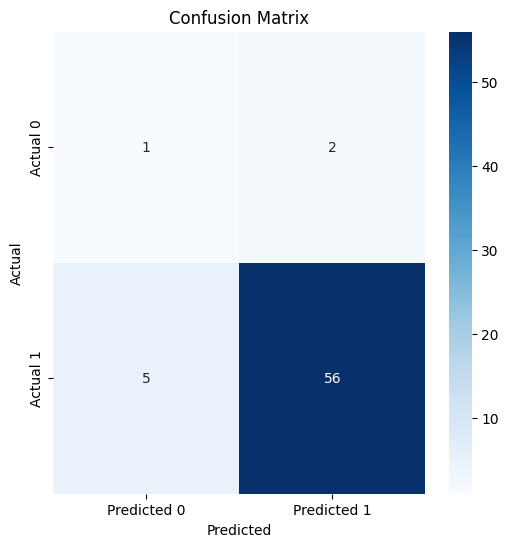

In [17]:
# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a list of class labels
class_labels = ['0', '1']

# Plot confusion matrix as heatmap
plt.figure(figsize=(6, 6))

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

# Add labels, title, and ticks
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [18]:
print(metric_report)

              precision    recall  f1-score   support

           0       0.17      0.33      0.22         3
           1       0.97      0.92      0.94        61

    accuracy                           0.89        64
   macro avg       0.57      0.63      0.58        64
weighted avg       0.93      0.89      0.91        64

